In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [55]:
dataset_red = pd.read_csv("newDataSet/winequality-red.csv", sep=";", index_col=False)
dataset_white = pd.read_csv("/Users/daytoy/Downloads/LeaningDeepLearning-master/newDataSet/winequality-white.csv", sep=";", index_col=False)
red = ["red"] * len(dataset_red)
dataset_red.insert(0, "Label", 1)
white = ["white"] * len(dataset_white)
dataset_white.insert(0, "Label", 0)
dataset = pd.concat([dataset_red, dataset_white], axis=0)
dataset.set_index("Label")

FileNotFoundError: [Errno 2] No such file or directory: '/newDataSet/winequality-red.csv'

(5197, 12)


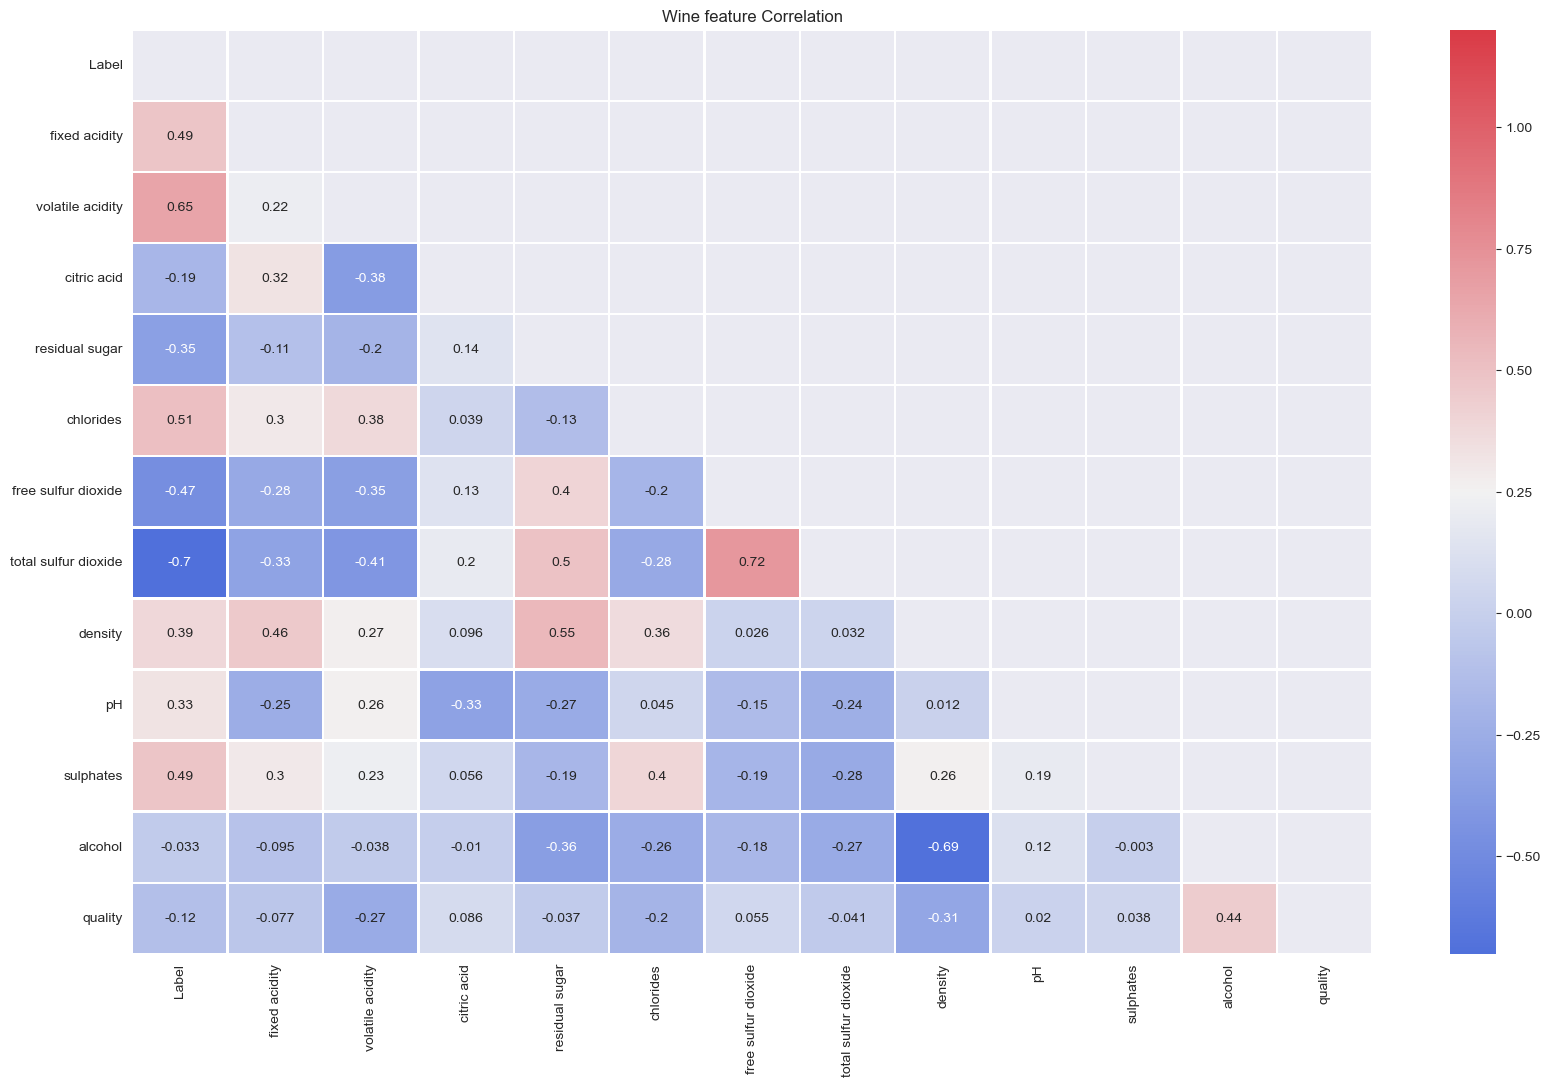

In [48]:
corrMatt = dataset.corr()
# print(corrMatt)  相关矩阵

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Wine feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
            ax=ax, annot=True, fmt='.2g', linewidths=1);

#preprocessing
le = LabelEncoder()
dataset["Label"] = le.fit_transform(dataset["Label"])
y = dataset["Label"]
X = dataset.drop('Label', axis=1)

#split the dataset into trainning set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#Normalization
norm = Normalizer()
norm = norm.fit(X_train)
Xn_train = norm.transform(X_train)
Xn_test = norm.transform(X_test)
print(Xn_train.shape)

#Feature selection
selector = SelectKBest(chi2, k=8)
Xnf_train = selector.fit_transform(Xn_train, y_train)
Xnf_test = selector.transform(Xn_test)

In [49]:
#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(Xnf_test,y_test)

LogisticRegression()

In [50]:
model.score(Xnf_train, y_train)

0.9034058110448335

In [52]:
# K fold validation
score = cross_val_score(model, Xnf_train, y_train, cv=5, scoring='f1_macro')
print(score.mean())

TypeError: can only concatenate str (not "numpy.float64") to str